## Exemple 1 : 

In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz
from sklearn.model_selection import KFold

In [2]:
# Create DataFrame from 'balance-scale.data'
balance_data = pd.read_csv('balance-scale.data',sep=',',header=None)

In [3]:
balance_data

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4


In [4]:
balance_data.shape

(625, 5)

In [6]:
# We take the four last columns of the dataFrame and put it into X
X = balance_data.values[:,1:5]

In [7]:
X

array([[1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 3],
       ...,
       [5, 5, 5, 3],
       [5, 5, 5, 4],
       [5, 5, 5, 5]], dtype=object)

In [8]:
X.shape

(625, 4)

In [9]:
# We take the first column of the dataFrame and put it into Y
Y = balance_data.values[:,0]

In [10]:
Y

array(['B', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L',
       'B', 'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L',
       'B', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L',
       'B', 'R', 'L', 'B', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'B',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L',
       'B', 'L', 'L', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'L', 'R',
       'R', 'R', 'R', 'B', 'R', 'R', 'R', 'R', 'L', 'B', 'R', 'R', 'R',
       'B', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'B', 'R', 'L',
       'B', 'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'B', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L

In [11]:
Y.shape

(625,)

In [26]:
# We take a sample of 0.3 of the whole data and create a tree 
# of max depth of 3 and 5 leaves at least 
# We want to predict the result of 0 from columns [1,2,3,4]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3)

In [28]:
clf_entropy=DecisionTreeClassifier(criterion="entropy",max_depth=3,min_samples_leaf=5)

In [14]:
clf_entropy

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [15]:
# Fit function adjusts weights according to data values 
# so that better accuracy can be achieved
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)

In [16]:
y_pred_en = clf_entropy.predict(X_test)

In [17]:
y_pred_en

array(['R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R',
       'R', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'L',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'L', 'R', 'R',
       'L', 'R', 'R', 'L', 'L', 'L', 'R', 'R', 'R', 'L', 'R', 'R', 'L',
       'L', 'L', 'R', 'R', 'L', 'L', 'R', 'L', 'L', 'R', 'L', 'L', 'R',
       'R', 'L', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'R',
       'R', 'R', 'R', 'L', 'R', 'R', 'R', 'L', 'R', 'R', 'L', 'L', 'L',
       'R', 'R', 'R', 'R', 'R', 'L', 'L', 'R', 'L', 'R', 'R', 'L', 'R',
       'R', 'L', 'L', 'R', 'R', 'L', 'L', 'R', 'R', 'L', 'L', 'L', 'L',
       'R', 'R', 'L', 'R', 'L', 'R', 'L', 'R', 'L', 'R', 'R', 'R', 'L',
       'R', 'R', 'L', 'L', 'R', 'L', 'R', 'L', 'L', 'R', 'R', 'L', 'L',
       'L', 'R', 'R', 'L', 'L', 'R', 'R', 'R', 'L', 'L', 'R', 'R', 'L',
       'L', 'R', 'L', 'R', 'R', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'L', 'L', 'L', 'L', 'L', 'L', 'R

In [18]:
y_pred_en.shape

(188,)

In [29]:
# We calculates the accuracy of the predicting algorithme 
# The accuracy changes when we change the sample 
print ("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy is  44.680851063829785


# Exemple 2 : 

In [37]:
Jogging_data=pd.read_csv('JoggingTitre.csv', sep=',')

In [38]:
Jogging_data

,Perspective,Temps,Humidité,Vent,Jogging
0,Soleil,Chaud,Haute,Doux,Non
1,Soleil,Chaud,Haute,Fort,Non
2,Couvert,Chaud,Haute,Doux,Oui
3,Pluie,Bon,Haute,Doux,Oui
4,Pluie,Frais,Normale,Doux,Oui
5,Pluie,Frais,Normale,Fort,Non
6,Couvert,Frais,Normale,Fort,Oui
7,Soleil,Bon,Haute,Doux,Non
8,Soleil,Frais,Normale,Doux,Oui
9,Pluie,Bon,Normale,Doux,Oui


In [39]:
# Get the Column 'Jogging'
y = Jogging_data['Jogging']
# "axis = 1" for columns
x = Jogging_data.drop(['Jogging'],axis=1)

In [41]:
# Convert categorical variable into dummy/indicator variables
x_dum = pd.get_dummies(x)

In [42]:
# We can see the perspectives
x_dum

,Perspective_Couvert,Perspective_Pluie,Perspective_Soleil,Temps_Bon,Temps_Chaud,Temps_Frais,Humidité_Haute,Humidité_Normale,Vent_Doux,Vent_Fort
0,0,0,1,0,1,0,1,0,1,0
1,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,1,0,1,0,1,0
3,0,1,0,1,0,0,1,0,1,0
4,0,1,0,0,0,1,0,1,1,0
5,0,1,0,0,0,1,0,1,0,1
6,1,0,0,0,0,1,0,1,0,1
7,0,0,1,1,0,0,1,0,1,0
8,0,0,1,0,0,1,0,1,1,0
9,0,1,0,1,0,0,0,1,1,0


In [43]:
# we create the decision tree and fit it to the data we have
clf_entropy = DecisionTreeClassifier(criterion = "entropy")

In [44]:
clf_entropy

DecisionTreeClassifier(criterion='entropy')

In [45]:
outputTree=clf_entropy.fit(x_dum, y)

In [46]:
outputTree

DecisionTreeClassifier(criterion='entropy')

In [47]:
# we export it into graphviz format and we print it in a pdf file
# the indexes are displayed instead of labls
# the tree is labeled by the labels of the dataset
dot_data = tree.export_graphviz(outputTree, out_file=None)

In [48]:
dot_data

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[0] <= 0.5\\nentropy = 0.94\\nsamples = 14\\nvalue = [5, 9]"] ;\n1 [label="X[6] <= 0.5\\nentropy = 1.0\\nsamples = 10\\nvalue = [5, 5]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="X[9] <= 0.5\\nentropy = 0.722\\nsamples = 5\\nvalue = [1, 4]"] ;\n1 -> 2 ;\n3 [label="entropy = 0.0\\nsamples = 3\\nvalue = [0, 3]"] ;\n2 -> 3 ;\n4 [label="X[2] <= 0.5\\nentropy = 1.0\\nsamples = 2\\nvalue = [1, 1]"] ;\n2 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 1]"] ;\n4 -> 6 ;\n7 [label="X[1] <= 0.5\\nentropy = 0.722\\nsamples = 5\\nvalue = [4, 1]"] ;\n1 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 3\\nvalue = [3, 0]"] ;\n7 -> 8 ;\n9 [label="X[8] <= 0.5\\nentropy = 1.0\\nsamples = 2\\nvalue = [1, 1]"] ;\n7 -> 9 ;\n10 [label="entropy = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n9 -> 10 ;\n11 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 1]"]

In [49]:
graph = graphviz.Source(dot_data)

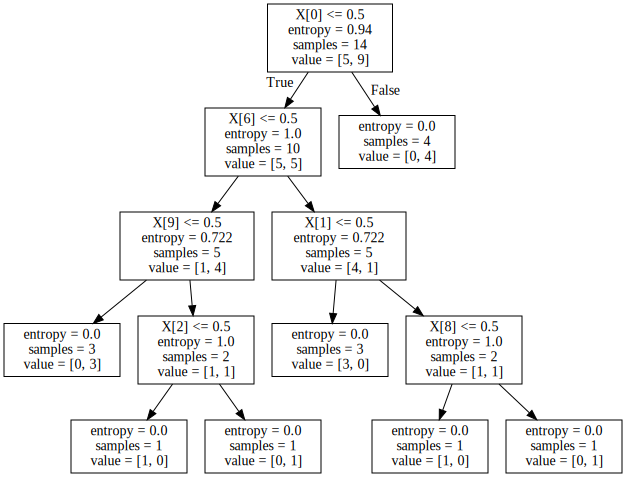

In [50]:
graph

In [51]:
graph.render("Td2_dum01")

'Td2_dum01.pdf'

In [52]:
dot_data = tree.export_graphviz(outputTree, out_file=None, feature_names =
x_dum.columns)

In [53]:
dot_data

'digraph Tree {\nnode [shape=box] ;\n0 [label="Perspective_Couvert <= 0.5\\nentropy = 0.94\\nsamples = 14\\nvalue = [5, 9]"] ;\n1 [label="Humidité_Haute <= 0.5\\nentropy = 1.0\\nsamples = 10\\nvalue = [5, 5]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Vent_Fort <= 0.5\\nentropy = 0.722\\nsamples = 5\\nvalue = [1, 4]"] ;\n1 -> 2 ;\n3 [label="entropy = 0.0\\nsamples = 3\\nvalue = [0, 3]"] ;\n2 -> 3 ;\n4 [label="Perspective_Soleil <= 0.5\\nentropy = 1.0\\nsamples = 2\\nvalue = [1, 1]"] ;\n2 -> 4 ;\n5 [label="entropy = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n4 -> 5 ;\n6 [label="entropy = 0.0\\nsamples = 1\\nvalue = [0, 1]"] ;\n4 -> 6 ;\n7 [label="Perspective_Pluie <= 0.5\\nentropy = 0.722\\nsamples = 5\\nvalue = [4, 1]"] ;\n1 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 3\\nvalue = [3, 0]"] ;\n7 -> 8 ;\n9 [label="Vent_Doux <= 0.5\\nentropy = 1.0\\nsamples = 2\\nvalue = [1, 1]"] ;\n7 -> 9 ;\n10 [label="entropy = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n9 -> 1

In [54]:
graph = graphviz.Source(dot_data)

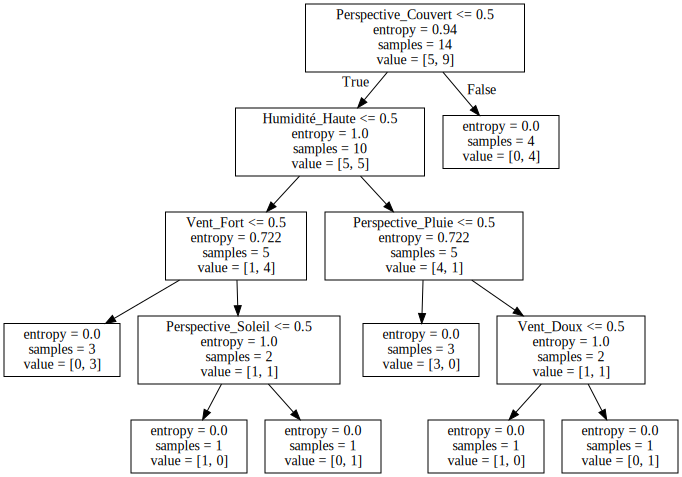

In [55]:
graph

In [56]:
graph.render("Td2_dum01Name")

'Td2_dum01Name.pdf'

# Exemple 3 

In [58]:
balance_data = pd.read_csv('balance-scale.data', sep= ',', header= None)

In [59]:
balance_data

,0,1,2,3,4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5
...,...,...,...,...,...
620,L,5,5,5,1
621,L,5,5,5,2
622,L,5,5,5,3
623,L,5,5,5,4


In [60]:
X = balance_data.values[:, 1:5]
Y = balance_data.values[:,0]

In [64]:
# Provides train/test indices to split data in train/test sets.
# Split dataset into 10 consecutive folds
kfold = KFold(10, True, 10)

In [62]:
# Init ac and accuracy score at 0
ac=0.0
ac_score=0.0

In [66]:
# Calculates the sum of accuracy 
for train, test in kfold.split(X):
    X_train, X_test, y_train, y_test = X[train], X[test], Y[train], Y[test]
    clf_entropy.fit(X_train, y_train)
    y_pred_en = clf_entropy.predict(X_test)
    ac_score=accuracy_score(y_test,y_pred_en)*100
    ac=ac+ac_score
    print ("Accuracy is ", ac_score)

Accuracy is  76.19047619047619
Accuracy is  73.01587301587301
Accuracy is  80.95238095238095
Accuracy is  85.71428571428571
Accuracy is  77.77777777777779
Accuracy is  75.80645161290323
Accuracy is  83.87096774193549
Accuracy is  79.03225806451613
Accuracy is  74.19354838709677
Accuracy is  74.19354838709677


In [67]:
# The average accuracy is sum of accuracy / k (k = 10)
ac_avg=ac/10
print ("Average Accuracy is ", ac_avg)

Average Accuracy is  78.0747567844342


# Part 2 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
balance_data = pd.read_csv('zoo.data', sep= ',', header= None)
balance_data.shape
X = balance_data.values[:, 1:5]
Y = balance_data.values[:,0]
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth=3,
min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)
y_pred_en = clf_entropy.predict(X_test)
print ("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)

Accuracy is  0.0






import numpy as np
from sklearn import preprocessing
import pandas as pd
 
...
from sklearn.model_selection import KFold
le = preprocessing.LabelEncoder()
balance_data = pd.read_csv('zoo.data', sep= ',', header= None)
data = balance_data.apply(le.fit_transform)
X = data.values[:, 1:5]
Y = data.values[:,0]
kfold = KFold(10, True, 10)
ac=0.0
ac_score=0.0
for train, test in kfold.split(X):
 X_train, X_test, y_train, y_test = X[train], X[test], Y[train], Y[test]
 clf_entropy.fit(X_train, y_train)
y_pred_en = clf_entropy.predict(X_test)
ac_score=accuracy_score(y_test,y_pred_en)*100
ac=ac+ac_score
print ("Accuracy is ", ac_score)
ac_avg=ac/10
print ("Average Accuracy is ", ac_avg)



import numpy as np
from sklearn import preprocessing
import pandas as pd
 
...
from sklearn.model_selection import KFold
le = preprocessing.LabelEncoder()
balance_data = pd.read_csv('tic-tac-toe.data', sep= ',', header= None)
data = balance_data.apply(le.fit_transform)
X = data.values[:, 1:5]
Y = data.values[:,0]
kfold = KFold(10, True, 10)
ac=0.0
ac_score=0.0
for train, test in kfold.split(X):
 X_train, X_test, y_train, y_test = X[train], X[test], Y[train], Y[test]
 clf_entropy.fit(X_train, y_train)
y_pred_en = clf_entropy.predict(X_test)
ac_score=accuracy_score(y_test,y_pred_en)*100
ac=ac+ac_score
print ("Accuracy is ", ac_score)
ac_avg=ac/10
print ("Average Accuracy is ", ac_avg)





import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
balance_data = pd.read_csv('zoo.data', sep= ',', header= None)
balance_data.shape
X = balance_data.values[:, 1:5]
print (x)
Y = balance_data.values[:,0]
print (y)
 
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth=3,
min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)
y_pred_en = clf_entropy.predict(X_test)
print ("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)




import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
balance_data = pd.read_csv('tic-tac-toe.data', sep= ',', header= None)
balance_data.shape
X = balance_data.values[:, 1:5]
print (x)
Y = balance_data.values[:,0]
print (y)
 
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", max_depth=3,
min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)
y_pred_en = clf_entropy.predict(X_test)
print ("Accuracy is ", accuracy_score(y_test,y_pred_en)*100)


import numpy as np
...
import graphviz
Jogging_data=pd.read_csv('car.data', sep=',')
y=Jogging_data['Jogging']
x=Jogging_data.drop(['Jogging'], axis=1)
x_dum=pd.get_dummies(x)
x_dum
# partiel dummies : sub_dum=pd.get_dummies(x, columns=['Temps', 'Vent'])
clf_entropy = DecisionTreeClassifier(criterion = "entropy")
outputTree=clf_entropy.fit(x_dum, y)
dot_data = tree.export_graphviz(outputTree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Td2_dum01")
dot_data = tree.export_graphviz(outputTree, out_file=None, feature_names =
x_dum.columns)
graph = graphviz.Source(dot_data)
graph.render("Td2_dum01Name")